# Introduction

Basic image enhancement with OpenCV. Based on the lecture content of the OpenCV Bootcamp on opencv.org.

# Install dependencies

In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

from IPython.display import Image

%matplotlib inline

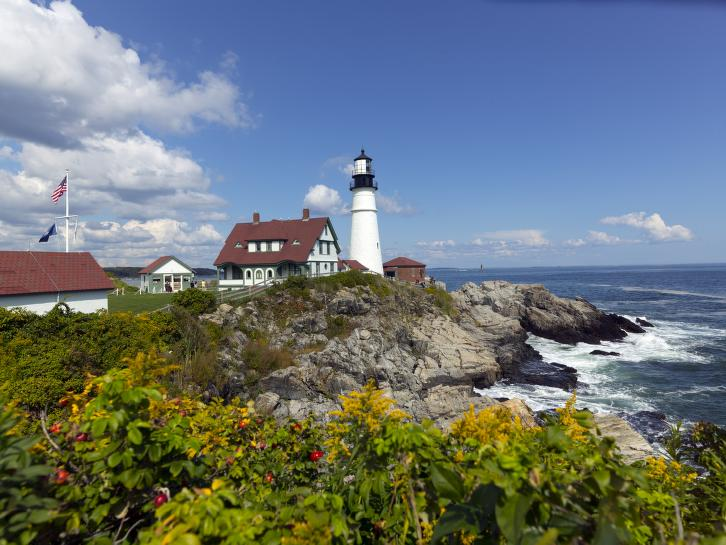

In [2]:
image_bgr = cv2.imread("data/lighthouse.jpg", cv2.IMREAD_COLOR)
image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)

Image(filename="data/lighthouse.jpg")

# Change brightness

Text(0.5, 1.0, 'Brighter')

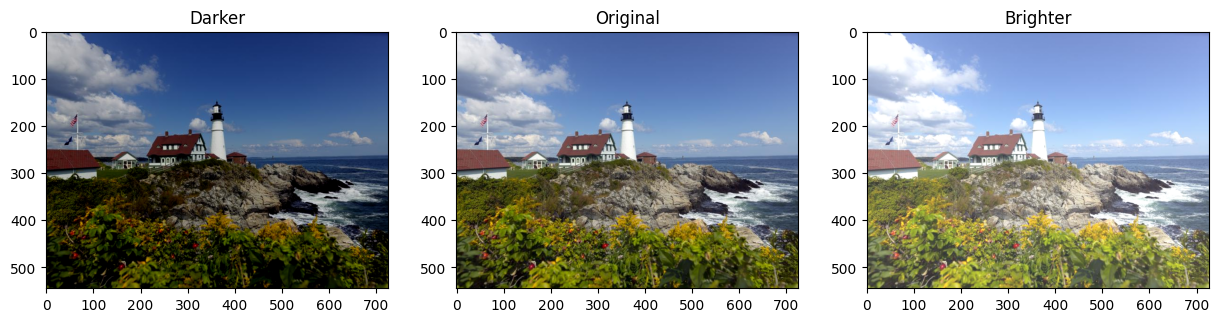

In [3]:
matrix = np.ones(image_rgb.shape, dtype="uint8") * 50
image_rgb_brighter = cv2.add(image_rgb, matrix)
image_rgb_darker = cv2.subtract(image_rgb, matrix)

plt.figure(figsize=[15, 5])

plt.subplot(131)
plt.imshow(image_rgb_darker)
plt.title("Darker")

plt.subplot(132)
plt.imshow(image_rgb)         
plt.title("Original")

plt.subplot(133); 
plt.imshow(image_rgb_brighter)
plt.title("Brighter")

# Contrast

Text(0.5, 1.0, 'Higher Contrast')

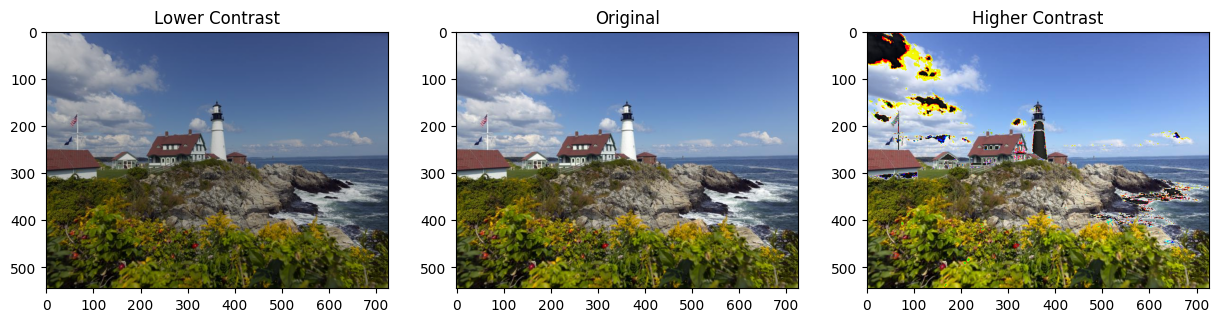

In [4]:
matrix1 = np.ones(image_rgb.shape) * 0.8
matrix2 = np.ones(image_rgb.shape) * 1.2

image_rgb_less_contrast = np.uint8(cv2.multiply(np.float64(image_rgb), matrix1))
image_rgb_more_contrast = np.uint8(cv2.multiply(np.float64(image_rgb), matrix2))

plt.figure(figsize=[15,5])

plt.subplot(131)
plt.imshow(image_rgb_less_contrast)
plt.title("Lower Contrast")

plt.subplot(132)
plt.imshow(image_rgb)
plt.title("Original")

plt.subplot(133)
plt.imshow(image_rgb_more_contrast)
plt.title("Higher Contrast")

# Clip pixel values

Text(0.5, 1.0, 'Higher Contrast')

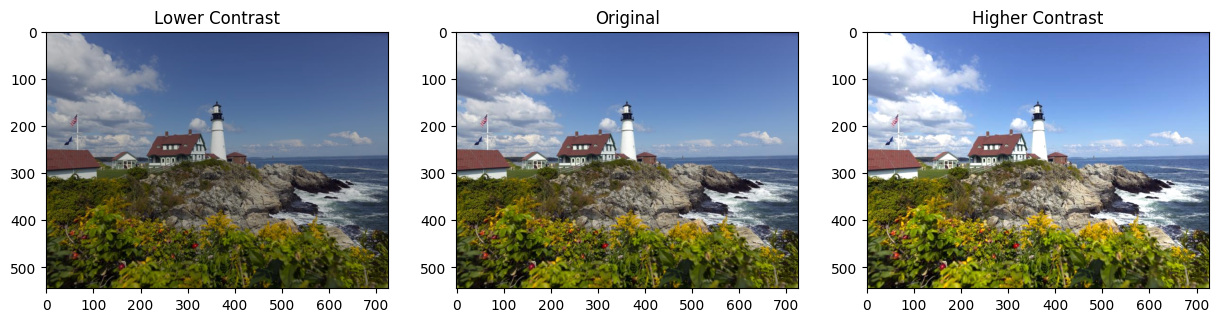

In [5]:
matrix1 = np.ones(image_rgb.shape) * 0.8
matrix2 = np.ones(image_rgb.shape) * 1.2

image_rgb_less_contrast = np.uint8(cv2.multiply(np.float64(image_rgb), matrix1))
image_rgb_more_contrast = np.uint8(np.clip(cv2.multiply(np.float64(image_rgb), matrix2), 0, 255))

plt.figure(figsize=[15,5])

plt.subplot(131)
plt.imshow(image_rgb_less_contrast)
plt.title("Lower Contrast")

plt.subplot(132)
plt.imshow(image_rgb)
plt.title("Original")

plt.subplot(133)
plt.imshow(image_rgb_more_contrast)
plt.title("Higher Contrast")

# Image thresholding

Text(0.5, 1.0, 'Thresholded')

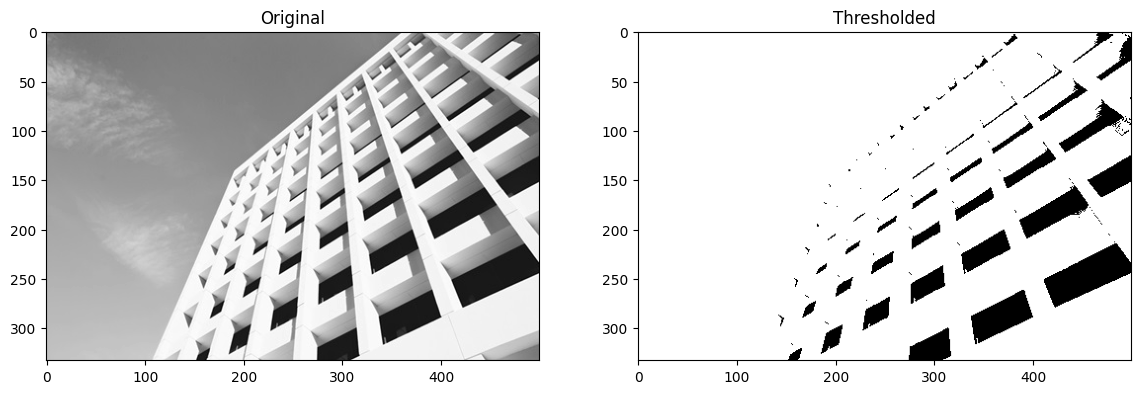

In [6]:
image_read = cv2.imread("data/building.jpg", cv2.IMREAD_GRAYSCALE)
retval, image_threshold = cv2.threshold(image_read, 100, 255, cv2.THRESH_BINARY)

plt.figure(figsize=[14, 5])

plt.subplot(121)
plt.imshow(image_read, cmap="gray")
plt.title("Original")

plt.subplot(122)
plt.imshow(image_threshold, cmap="gray")
plt.title("Thresholded")

# Adaptive threshold

Text(0.5, 1.0, 'Thresholded (adaptive)')

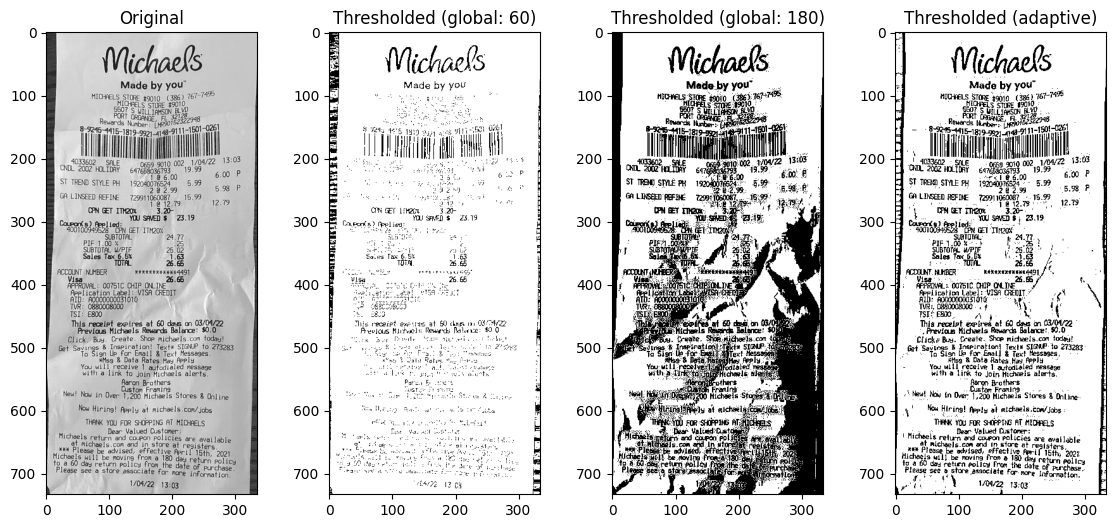

In [7]:
image_read = cv2.imread("data/receipt.jpg", cv2.IMREAD_GRAYSCALE)

retval, image_threshold_global_1 = cv2.threshold(image_read, 60, 255, cv2.THRESH_BINARY)
retval, image_threshold_glob_2 = cv2.threshold(image_read, 190, 255, cv2.THRESH_BINARY)
image_threshold_adpative = cv2.adaptiveThreshold(image_read, 255, cv2.ADAPTIVE_THRESH_MEAN_C, 
                                                 cv2.THRESH_BINARY, 11, 11)
plt.figure(figsize=[14,6])

plt.subplot(141)
plt.imshow(image_read, cmap="gray")
plt.title("Original")

plt.subplot(142)
plt.imshow(image_threshold_global_1, cmap="gray")
plt.title("Thresholded (global: 60)")

plt.subplot(143)
plt.imshow(image_threshold_glob_2,cmap="gray")
plt.title("Thresholded (global: 180)")

plt.subplot(144)
plt.imshow(image_threshold_adpative, cmap="gray")
plt.title("Thresholded (adaptive)")

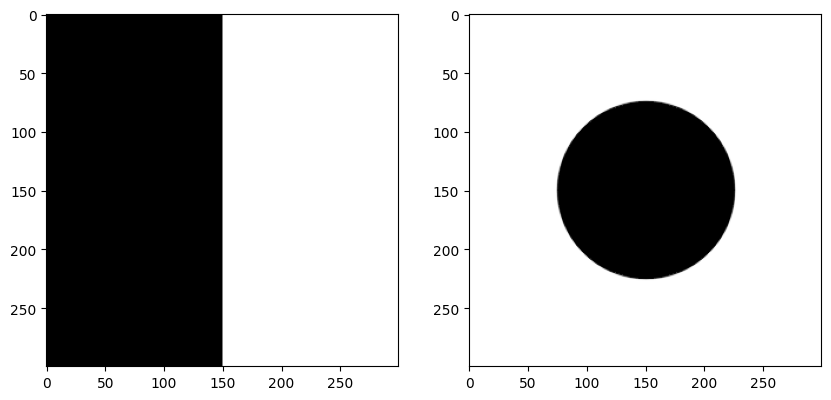

In [8]:
image1 = np.zeros((300, 300, 3), np.uint8)
image1 = cv2.rectangle(image1, (300, 300), (150, 0), (255, 255, 255), thickness=-1, lineType=cv2.LINE_8)

image2 = np.zeros((300, 300, 3), np.uint8)
image2[:] = (255, 255, 255)
cv2.circle(image2, (150, 150), 75, (0, 0, 0), thickness=-1, lineType=cv2.LINE_AA)

plt.figure(figsize=[10,5])

plt.subplot(121)
plt.imshow(image1, cmap="gray")

plt.subplot(122)
plt.imshow(image2, cmap="gray")


# Bitwise AND

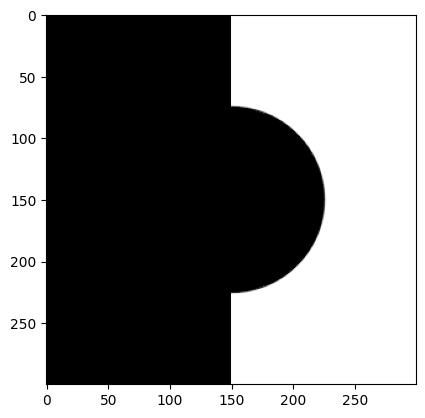

In [9]:
result = cv2.bitwise_and(image1, image2, mask=None)
plt.imshow(result, cmap="gray")

# Bitwise OR

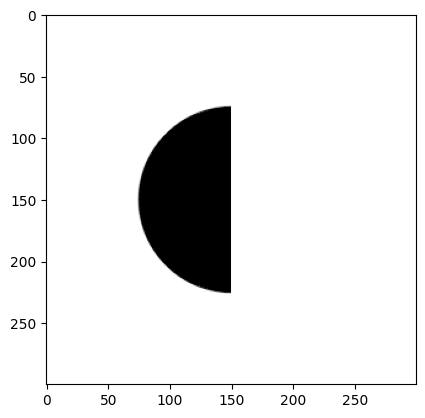

In [10]:
result = cv2.bitwise_or(image1, image2, mask=None)
plt.imshow(result, cmap="gray")

In [11]:
# Bitwise XOR

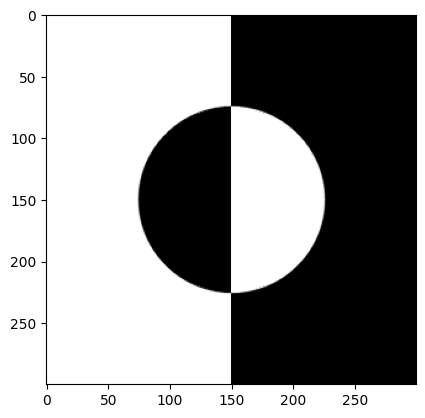

In [12]:
result = cv2.bitwise_xor(image1, image2, mask=None)
plt.imshow(result, cmap="gray")

# Combine two images using mask

Text(0.5, 1.0, 'Final result')

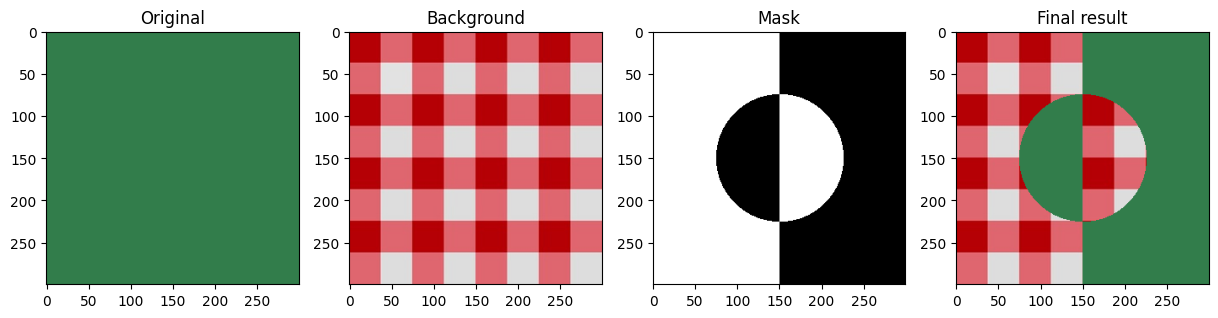

In [13]:
image_bgr = np.zeros((300, 300, 3), np.uint8)
image_bgr[:] = (75, 125, 50)
image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)

image_background_bgr = cv2.imread("data/background.jpg", cv2.IMREAD_COLOR)
image_background_rgb = cv2.cvtColor(image_background_bgr, cv2.COLOR_BGR2RGB)

image_gray = cv2.cvtColor(result, cv2.COLOR_RGB2GRAY)
retval, image_mask = cv2.threshold(image_gray, 127, 255, cv2.THRESH_BINARY)
image_mask_inv = cv2.bitwise_not(image_mask)

image_background = cv2.bitwise_and(image_background_rgb, image_background_rgb, mask=image_mask)
image_foreground = cv2.bitwise_and(image_rgb, image_rgb, mask=image_mask_inv)
final_image = cv2.add(image_foreground, image_background)

plt.figure(figsize=[15,5])

plt.subplot(141)
plt.imshow(image_rgb)
plt.title("Original")

plt.subplot(142)
plt.imshow(image_background_rgb)
plt.title("Background")

plt.subplot(143)
plt.imshow(image_mask, cmap="gray")
plt.title("Mask")

plt.subplot(144)
plt.imshow(final_image)
plt.title("Final result")
